In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/PhishingAnnit3t4.xlsx'

In [4]:
# Carica il file Excel
data = pd.read_excel(file_path)

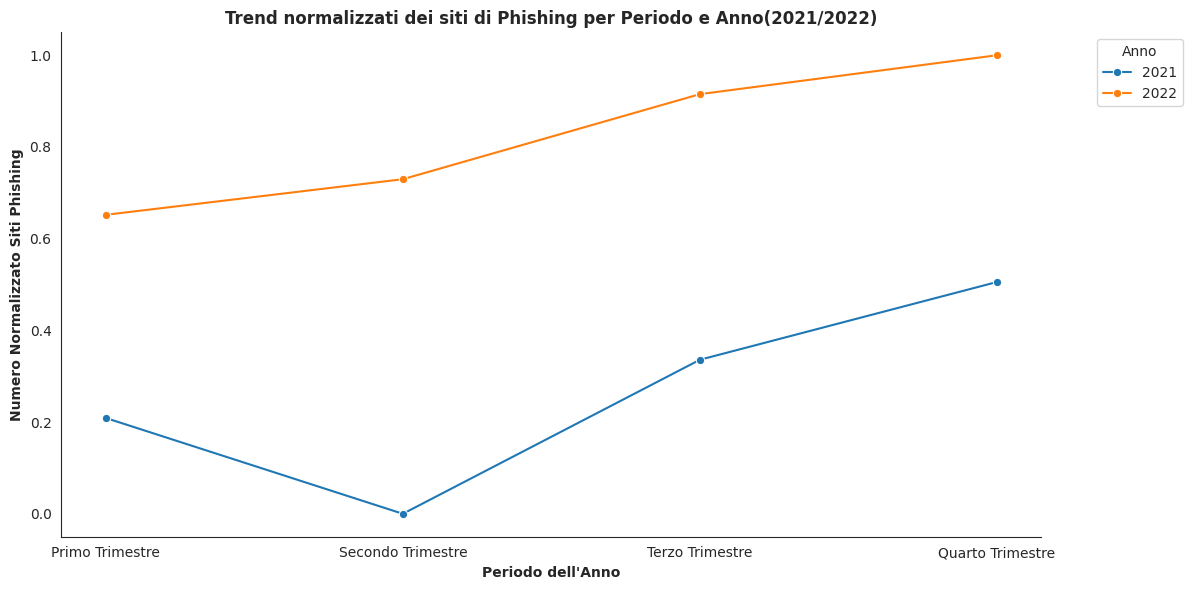

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Ordina i dati per 'Periodo Anno' in modo che siano visualizzati nell'ordine corretto
period_order = ['Primo Trimestre', 'Secondo Trimestre', 'Terzo Trimestre', 'Quarto Trimestre']
data['Periodo Anno'] = pd.Categorical(data['Periodo Anno'], categories=period_order, ordered=True)

# Normalizza i valori per ogni anno
scaler = MinMaxScaler()
data['Phishing Web sites Normalized'] = scaler.fit_transform(data[['Phishing Web sites']])

# Crea il grafico con le curve normalizzate
plt.figure(figsize=(12, 6))

# Rimuove la griglia di sfondo
sns.set_style("white")

# Crea il grafico con i periodi sull'asse x e una linea per ogni anno
sns.lineplot(
    data=data,
    x='Periodo Anno',
    y='Phishing Web sites Normalized',
    hue='Anno',
    marker='o',
    palette=['#1f77b4', '#ff7f0e']
)

# Personalizza il grafico
plt.title('Trend normalizzati dei siti di Phishing per Periodo e Anno(2021/2022)', fontweight='bold')
plt.xlabel('Periodo dell\'Anno', fontweight='bold')
plt.ylabel('Numero Normalizzato Siti Phishing', fontweight='bold')
plt.legend(title='Anno', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rimuove i bordi superiore e destro
sns.despine(top=True, right=True)

# Mostra il grafico
plt.tight_layout()
plt.show()
